<a href="https://colab.research.google.com/github/ParkStrat/Sales_Predictions/blob/main/Project_1_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mline
from matplotlib import rcParams
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo - Data Science/01. Week 1: Python/sales_predictions.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Data Cleaning

In [3]:
# Replace all the missing Item_Weight data with the average weight from the entire data set
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace = True)

In [4]:
# Replacing all missing Item_Sizes with 'Unknown' since there is no way to determine size
df['Outlet_Size'].fillna('Unknown', inplace = True)

In [5]:
# Checking column labeling consistancy
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [6]:
# Creating labeling consistancy for Item_fat_Content
df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'}, inplace = True)

The above actions cleaned the data and prepared it for statistical analysis

# Statistical Analysis

## Frequency Distribution Analysis

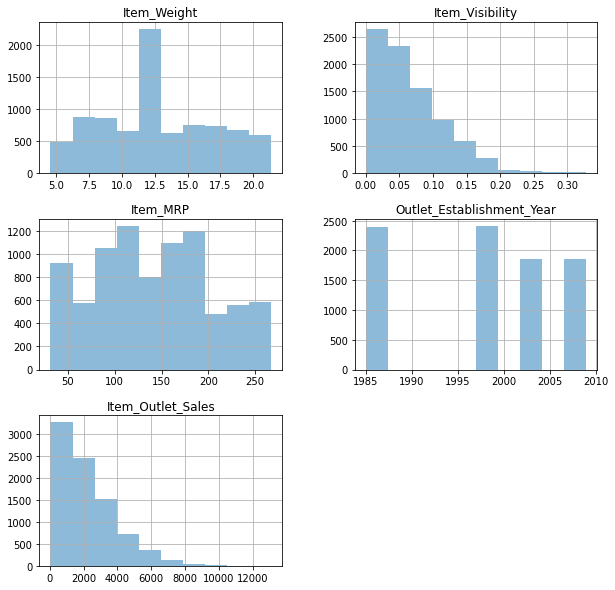

In [7]:
# Creating histograms of all the numerical categories in the dataset
df.hist(alpha = 0.5, figsize = (10, 10));

The above are frequeny distributions (Histograms) for all the numerical categories

* **Item_Weight:** The frequency spike at the mean weight is as a result of the datacleaning method I used (filling in all missing values with the mean value) otherwise Item_Weight has a relatively even distribution

* **Item_Visibility:** Stores only have so much display space and so it makes sense that only a few number of items take up large percentages of display space

* **Item_MRP:** Item MRP has a relatively even distribution

* **Outlet_Establishment_Year:** Nothing significant

* **Item_Outlet_Sales:** This Histogram indicates that there are a larger number of lower profit sales than high profit sales

## Correlation Analysis

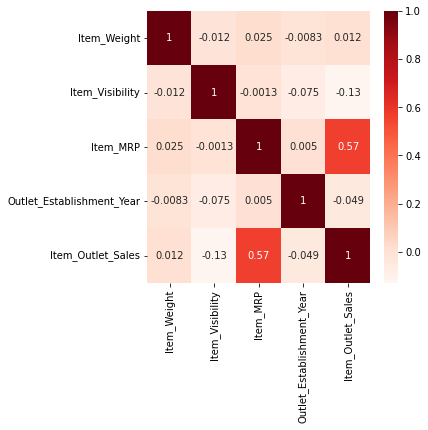

In [8]:
# Creating a heatmap to identify potential correlations within the dataset
corr = df.corr()
plt.figure(figsize = (5, 5))
sns.heatmap(corr, cmap = 'Reds', annot = True);

This heatmap indicates that the only numerical categories that have a correlation are Item_MRP and Item_Outlet_Sales (moderate correlation)

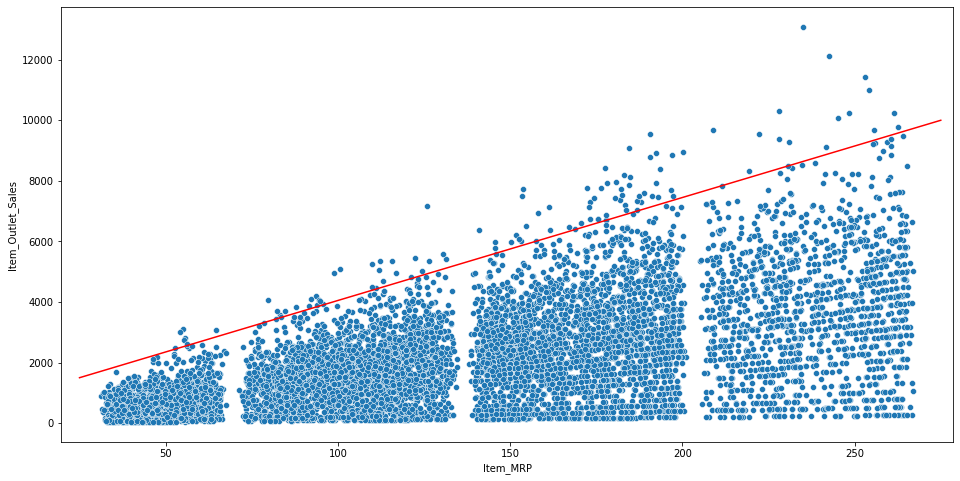

In [9]:
# Creating a scatter plot to visualize replationship between Item_MRP and Item_Outlet_Sales
line = mline.Line2D([25, 275], [1500, 10000], color = 'Red')
rcParams['figure.figsize'] = 16,8
sns.scatterplot(data = df, x = 'Item_MRP', y = 'Item_Outlet_Sales').add_line(line);

As the heatmap indicated, there is clearly a correlation between Item_MRP and Item_Outlet_Sales

## Item_MRP, Item_Outlet_Sales, and Outlet Information Analysis

### Outlet Size

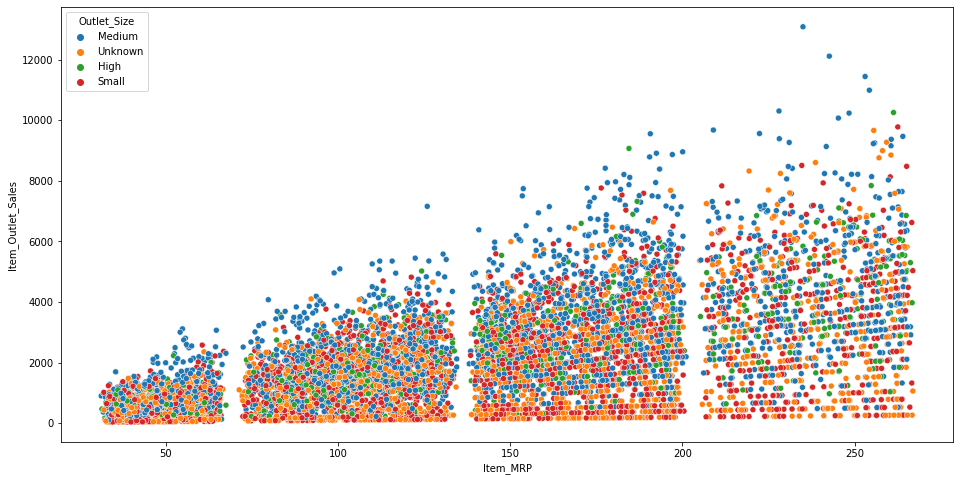

In [10]:
# Creating a scatter plot that compares Item_MRP, Item_Outlet_Sales and Outlet_Size
sns.scatterplot(data = df, x = 'Item_MRP', y = 'Item_Outlet_Sales', hue = 'Outlet_Size');

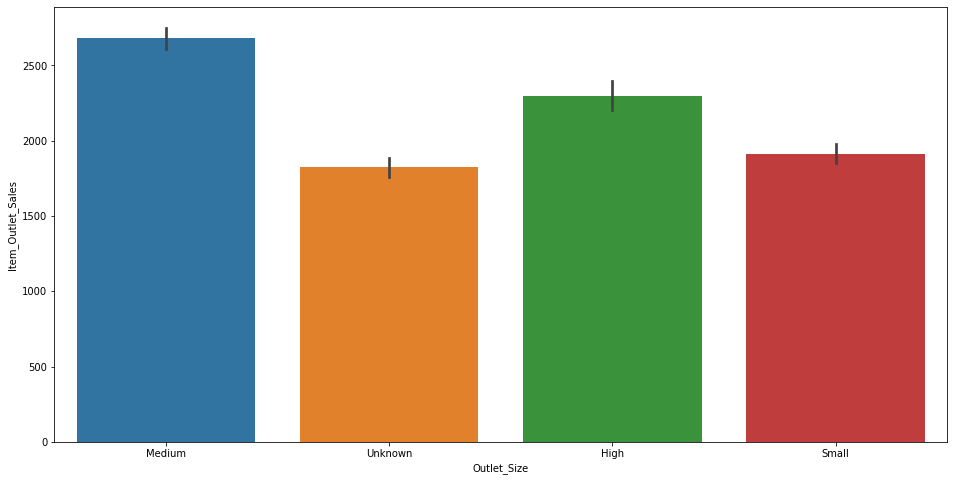

In [11]:
# Creating a Bar Chart that compares Outlet_Size to Item_Outlet_Sales
sns.barplot(data = df, x = 'Outlet_Size', y = 'Item_Outlet_Sales');

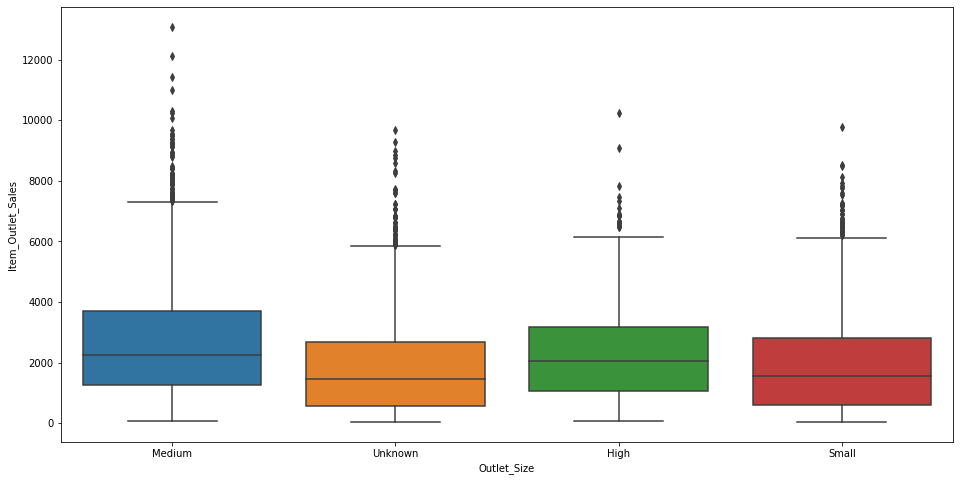

In [12]:
sns.boxplot(data = df, x = 'Outlet_Size', y = 'Item_Outlet_Sales');

These three chart show that Medium size outlets tend to have the highest sales followed by Large (high) sized outlets.

However in the data cleaning process I created the "Unknown" category, which could be skewing the data

### Outlet Location Type

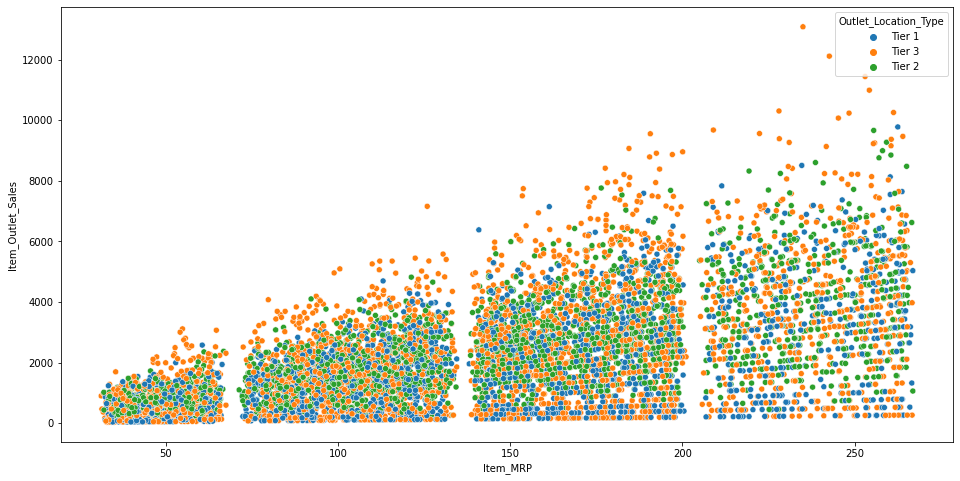

In [13]:
# Creating a scatter plot that compares Item_MRP, Item_Outlet_Sales and Outlet_Location_Type
sns.scatterplot(data = df, x = 'Item_MRP', y = 'Item_Outlet_Sales', hue = 'Outlet_Location_Type');

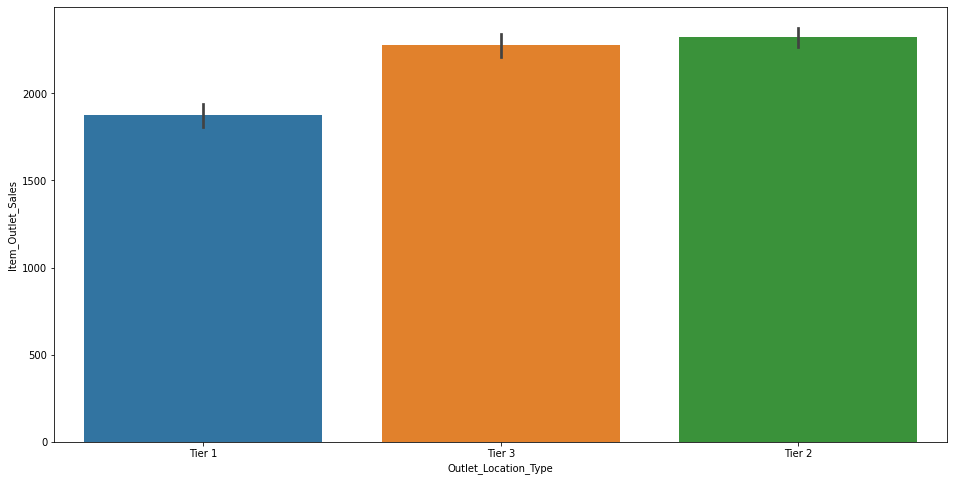

In [14]:
# Creating a Bar Chart that compares Outlet_Size to Outlet_Location_Type
sns.barplot(data = df, x = 'Outlet_Location_Type', y = 'Item_Outlet_Sales');

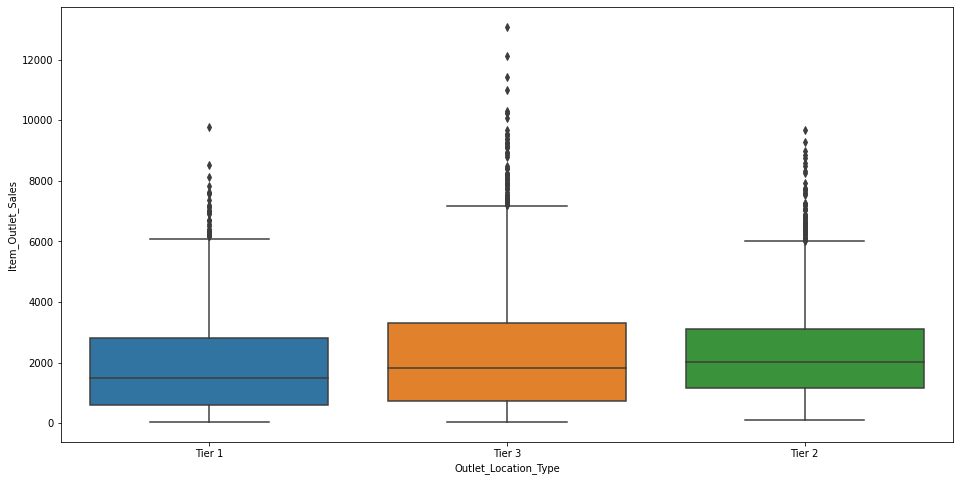

In [15]:
# Create a box plot comparing Outlet_Location_Type to Item_Outlet_Sales
sns.boxplot(data = df, x = 'Outlet_Location_Type', y = 'Item_Outlet_Sales');

These three charts indicate Tier 2 & 3 locations have the best sales. Tier 2 has higher average sales while Tier 3 has more outliers on the high end of sales. 

### Outlet Type

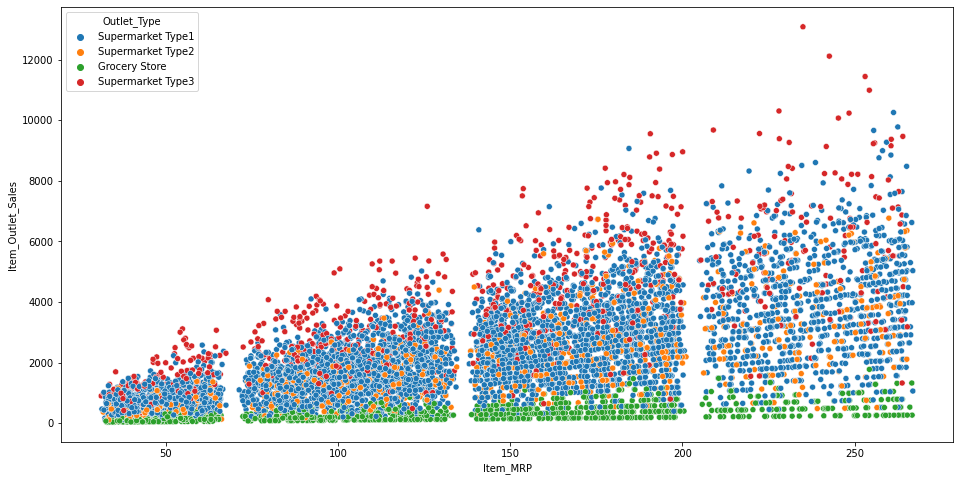

In [16]:
# Creating a scatter plot comparing Item_MRP, Item_Outlet_Sales, and Outley_Type
sns.scatterplot(data = df, x = 'Item_MRP', y = 'Item_Outlet_Sales', hue = 'Outlet_Type');

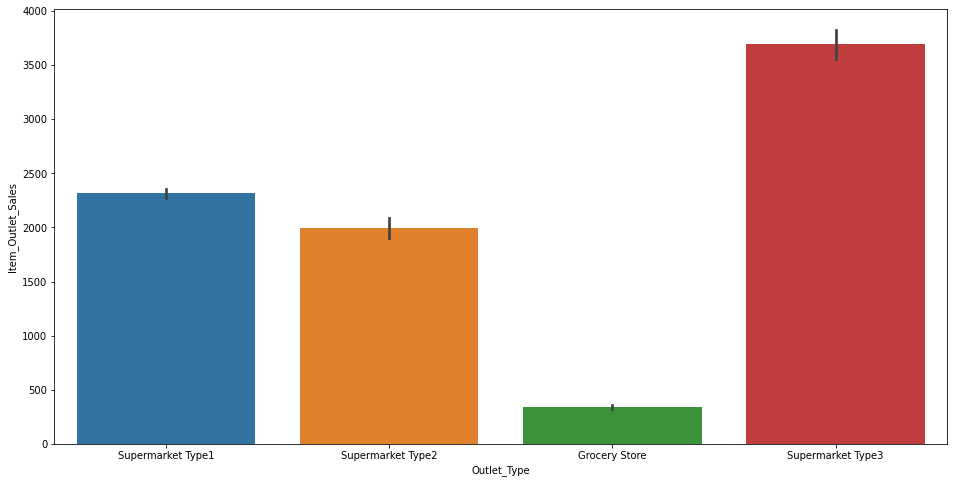

In [17]:
# Creating a bar plot comparing Item_Outlet_Sales and Outlet_Type
sns.barplot(data = df, x = 'Outlet_Type', y = 'Item_Outlet_Sales');

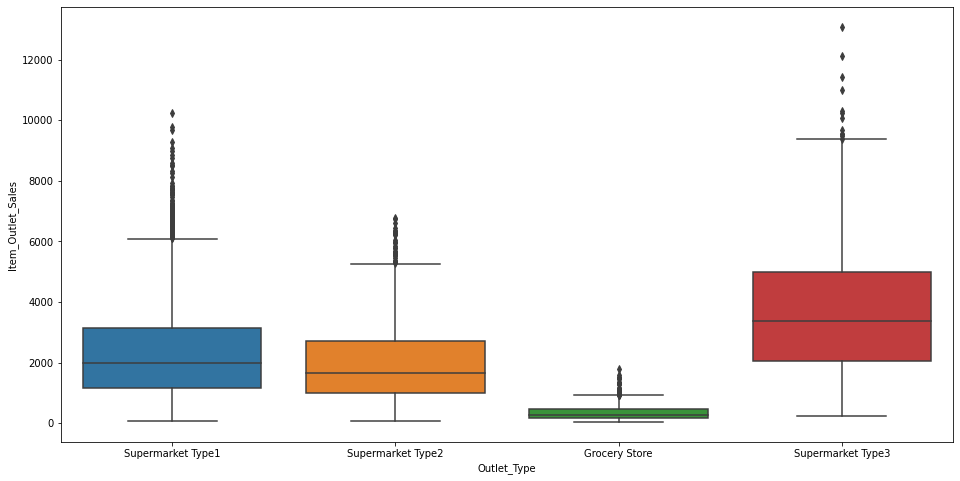

In [18]:
# Create a box plot comparing Outlet_Type to Item_Outlet_Sales
sns.boxplot(data = df, x = 'Outlet_Type', y = 'Item_Outlet_Sales');

These three charts indicate that Supermarket Type 3 have the most sales by far

## Item_MRP, Item_Outlet_Sales, and Item Information Analysis

### Item Fat Content

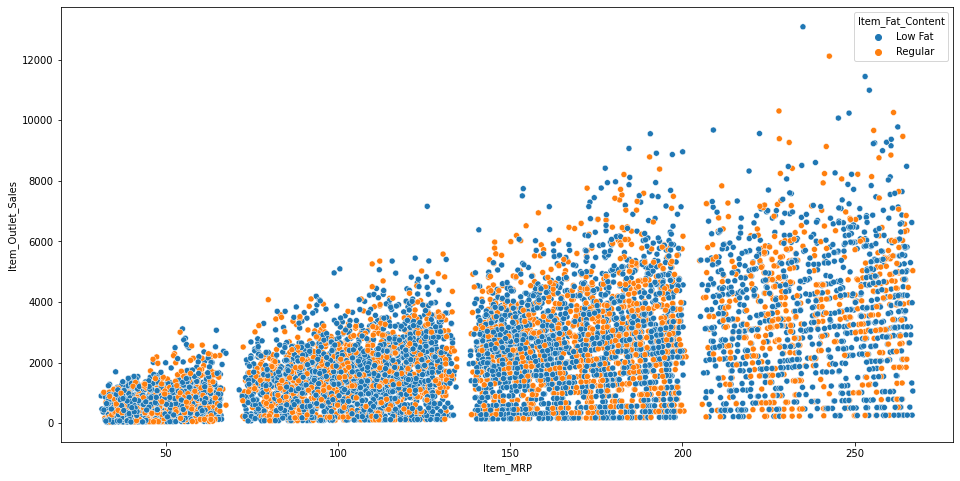

In [19]:
# Creating a scatter plot comparing Item_MRP, Item_Outlet_Sales, and Item_Fat_Content
sns.scatterplot(data = df, x = 'Item_MRP', y = 'Item_Outlet_Sales', hue = 'Item_Fat_Content');

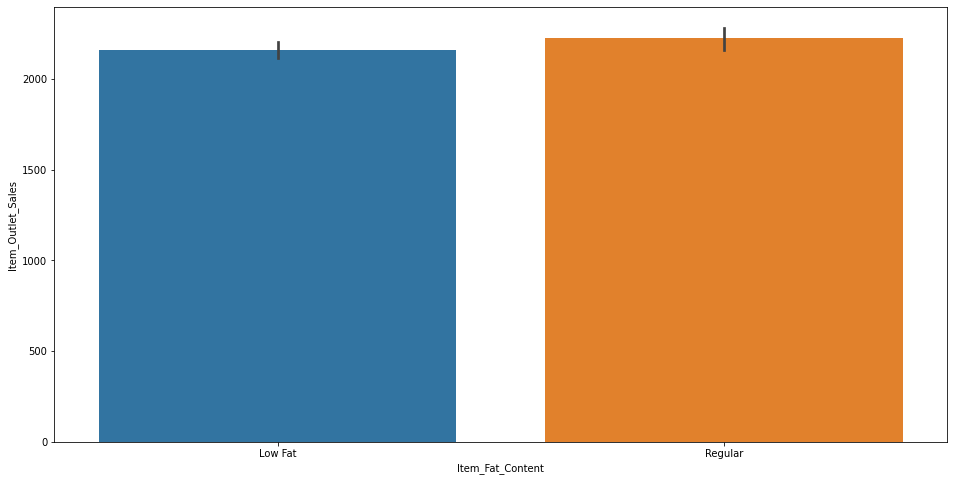

In [20]:
# Creating a bar plot comparing Item_Outlet_Sales and Item_Fat_Content
sns.barplot(data = df, x = 'Item_Fat_Content', y = 'Item_Outlet_Sales');

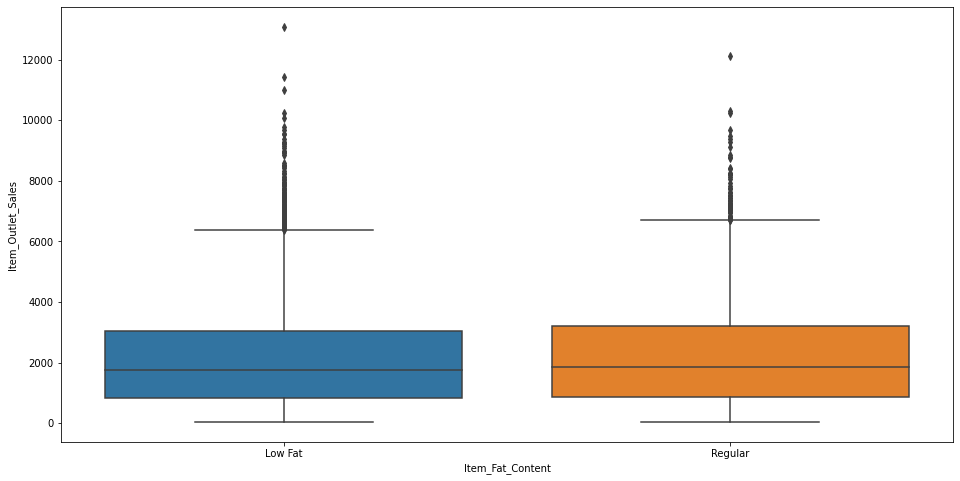

In [21]:
# Create a box plot comparing Item_Fat_Content to Item_Outlet_Sales
sns.boxplot(data = df, x = 'Item_Fat_Content', y = 'Item_Outlet_Sales');

These three charts indicate there does not seem to be much difference Fat Content when it comes to Item Sales

### Item Weight

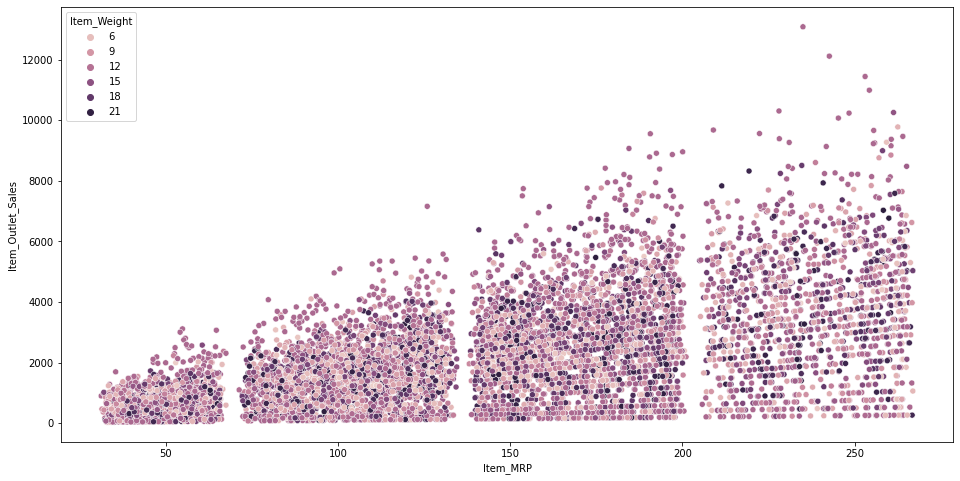

In [22]:
# Creating a scatter plot comparing Item_MRP, Item_Outlet_Sales, and Item_Weight
sns.scatterplot(data = df, x = 'Item_MRP', y = 'Item_Outlet_Sales', hue = 'Item_Weight');

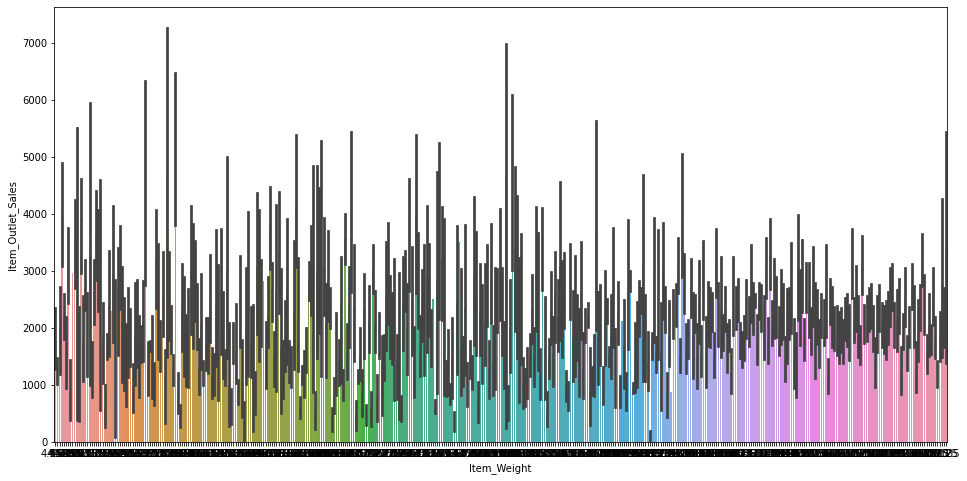

In [23]:
# Creating a bar plot comparing Item_Outlet_Sales and Item_Fat_Content
sns.barplot(data = df, x = 'Item_Weight', y = 'Item_Outlet_Sales');

It does not appear that Item Weight has much impact on Item Sales

## Item Visability Analysis

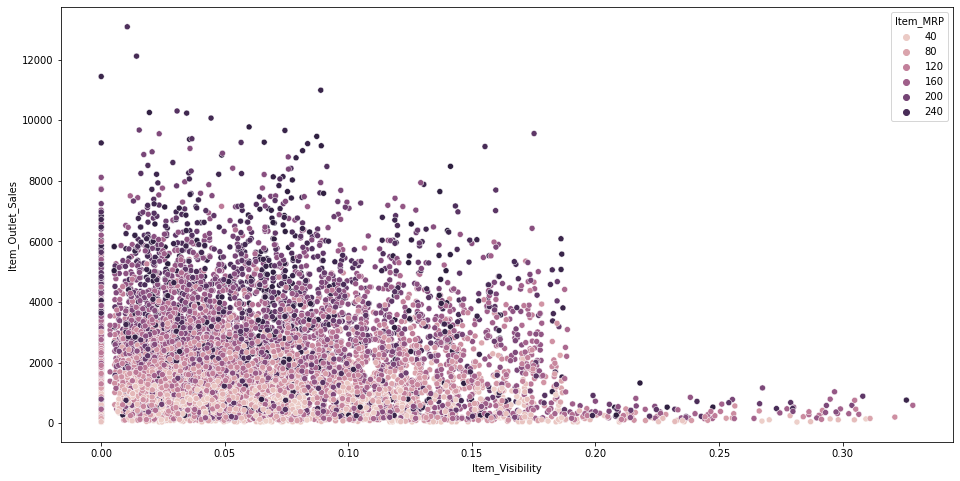

In [34]:
# Create a scatter plot that compares Item_Outlet_Sales, Item_Visibility, and Item_MRP
sns.scatterplot(data = df, x = 'Item_Visibility', y = 'Item_Outlet_Sales', hue = 'Item_MRP');

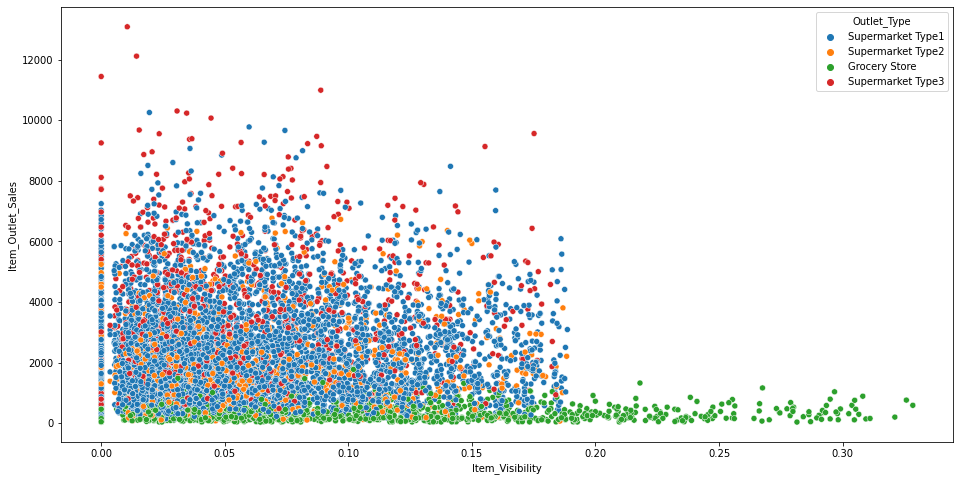

In [35]:
# Create a scatter plot that compares Item_Outlet_Sales, Item_Visibility, and Outlet_Type
sns.scatterplot(data = df, x = 'Item_Visibility', y = 'Item_Outlet_Sales', hue = 'Outlet_Type');

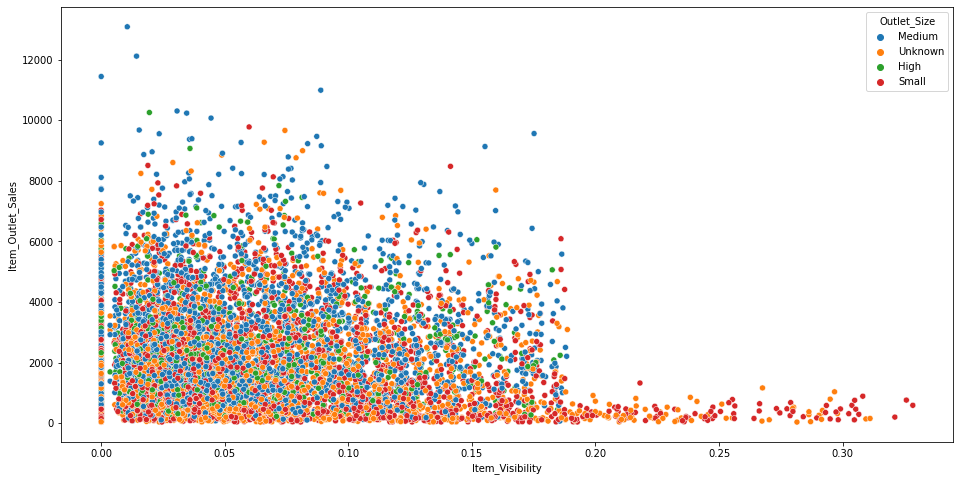

In [36]:
# Create a scatter plot that compares Item_Outlet_Sales, Item_Visibility, and Outlet_Size
sns.scatterplot(data = df, x = 'Item_Visibility', y = 'Item_Outlet_Sales', hue = 'Outlet_Size');

These three plots indiate that there is a large nunmber of Items that are taking up display space but are not generating high sales. Those items should be switched out with items that have less visibility and higher MRP.

The below calcuations will determine which items to shift to lower visibiltiy and which to swtich to higher visibility.

In [37]:
# Get numerical breakdown of Item_Visibility
df['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [38]:
# Get numerical breakdown of Item_MRP
df['Item_MRP'].describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

In [39]:
# Create boolean filters for Item_Visibility and Item_MRP
lowHalf = df['Item_Visibility'] < 0.05
highVis = df['Item_Visibility'] > 0.19
highMRP = df['Item_MRP'] > 185

In [40]:
# Create a filtered dataframe that only contains those items that have a visibility between .05 and .19 and have a MRP over 185
itemsToReduceVis = df[~lowHalf & ~highVis & highMRP]

In [41]:
# Get the details of Items that have a visibility between .05 and .19 and have a MRP over 185
itemsToReduceVis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1174 entries, 9 to 8518
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            1174 non-null   object 
 1   Item_Weight                1174 non-null   float64
 2   Item_Fat_Content           1174 non-null   object 
 3   Item_Visibility            1174 non-null   float64
 4   Item_Type                  1174 non-null   object 
 5   Item_MRP                   1174 non-null   float64
 6   Outlet_Identifier          1174 non-null   object 
 7   Outlet_Establishment_Year  1174 non-null   int64  
 8   Outlet_Size                1174 non-null   object 
 9   Outlet_Location_Type       1174 non-null   object 
 10  Outlet_Type                1174 non-null   object 
 11  Item_Outlet_Sales          1174 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 119.2+ KB


In [42]:
# Create a filtered dataframe that contains those items that should be considered for shifting to higher visibility (Visibility < .05 and MRP > 185)
itemsToIncreaseVis = df[lowHalf & highMRP]

In [43]:
# Get the details of Items that have a visibility below .05 and have a MRP over 185
itemsToIncreaseVis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 955 entries, 0 to 8511
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            955 non-null    object 
 1   Item_Weight                955 non-null    float64
 2   Item_Fat_Content           955 non-null    object 
 3   Item_Visibility            955 non-null    float64
 4   Item_Type                  955 non-null    object 
 5   Item_MRP                   955 non-null    float64
 6   Outlet_Identifier          955 non-null    object 
 7   Outlet_Establishment_Year  955 non-null    int64  
 8   Outlet_Size                955 non-null    object 
 9   Outlet_Location_Type       955 non-null    object 
 10  Outlet_Type                955 non-null    object 
 11  Item_Outlet_Sales          955 non-null    float64
dtypes: float64(4), int64(1), object(7)
memory usage: 97.0+ KB


These calculations show that there are 1174 items that are not producing sales despite taking up above average display space and there are 955 items that have high MRP but have below average display space

## Statistical Analysis Summary

Based on the above analysis, I can draw the following conclusions

* There is a correlation between Item MRP and Item Outlet Sales
 * Higher Item MRP generally results in greater Item Outlet Sales (positive correlation)
* Medium sized stores outsell the large and small
 * However, in the data cleaning process I lacked store size data for 2,410 items meaning this factor could be significantly skewed
* Store location Tiers 2 & 3 outsell Tier 1 locations
* Supermarkets of Type 3 significantly outsell the other types of stores
* Fat Content and Item Weight had no significant impact on sales
* Item Visibility seems to be the area where greatest imporvement can be achieved
 * Items with low sales are taking up a disproportionately large amount of display space
 * Many items with high MRP (a factor with positive correlation to sales) are under displayed
 * Shifting those items that are underselling and have high visibility (1174 items) to a less visable configuration while shifting those items with high MRP and low visibility (955 items) to higher visibility should result in imporved Outlet sales  

# Data Visualization

## Size vs Sales

In [62]:
df['Outlet_Size'].value_counts()

Medium     2793
Unknown    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

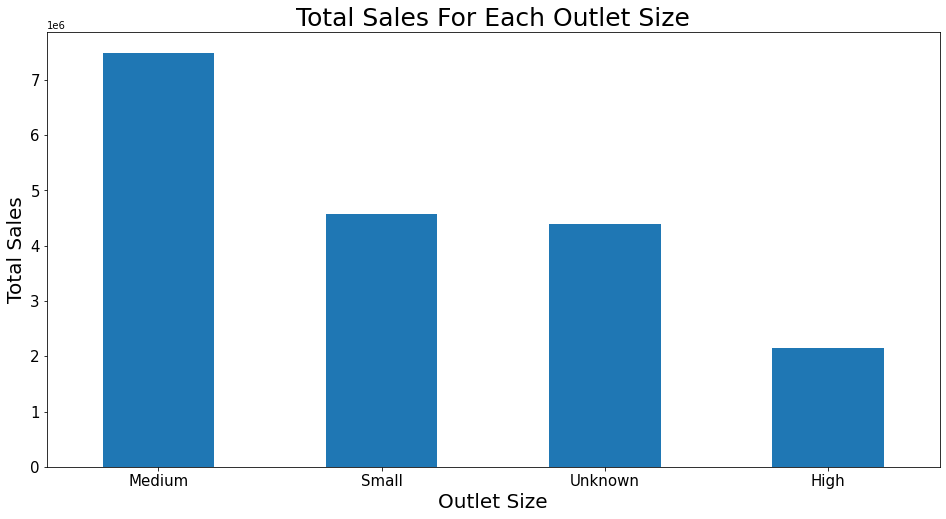

In [69]:
# Create a bar plot that compares the total outlet sales for each outlet size
df.groupby(['Outlet_Size'])['Item_Outlet_Sales'].sum().sort_values(ascending = False).plot.bar()
plt.title('Total Sales For Each Outlet Size', fontsize = 25)
plt.xlabel('Outlet Size', fontsize = 20)
plt.xticks(rotation = 0, fontsize = 15)
plt.ylabel('Total Sales', fontsize = 20)
plt.yticks(fontsize = 15);

This plot shows that medium sized outlets significantly outs sell the other store types. However, more information is needed to identify the store size for the "unknown" stores to ensure this information is accurate enough for the company to make decisions with.

## Incorrect Item Visibility

In [135]:
# Calculating the percentages of item sales that could have their visibility shifted and setting up a discitonary 
percentToIncrease = salesToIncrease / totalSales * 100
percentToReduce = salesToReduce / totalSales * 100
everythingElse = 100 - percentToIncrease - percentToReduce
itemVisSwap = {'Items Lacking Visibility': percentToIncrease, 'Items Too Visible': percentToReduce, 'Correct Visibility': everythingElse}

In [136]:
# Setting the x and y lists
key = list(itemVisSwap.keys())
vals = list(itemVisSwap.values())

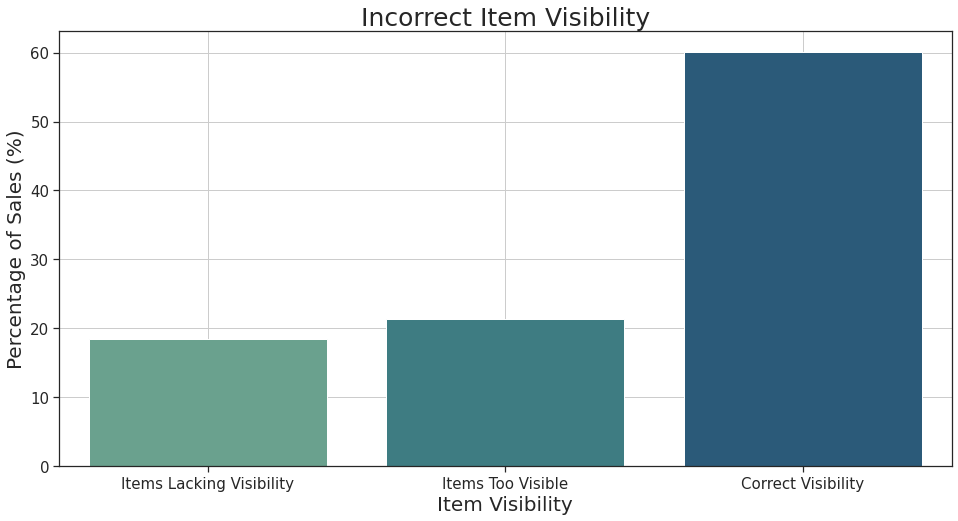

In [137]:
# Create a bar plot that compares the percent of sales for items that could have their visibility shifted
sns.barplot(x = key, y = vals, palette = 'crest')
plt.grid()
plt.title('Incorrect Item Visibility', fontsize = 25)
plt.xlabel('Item Visibility', fontsize = 20)
plt.xticks(rotation = 0, fontsize = 15)
plt.ylabel('Percentage of Sales (%)', fontsize = 20)
plt.yticks(fontsize = 15);

This plot shows that almost 20 percent of sales are from items not dsiplayed properly, meaning there is a larged untapped potential for increased sales - the dataframe: itemsToIncreaseVis is a list of all the items that could have increased visibility and the dataframe: itemsToReduceVis is a list of all the itesm that could have decreased visibility 